In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\araku\Downloads\ML\DataScience\archive (1)\Health_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Understanding the distribution of data:
### Region

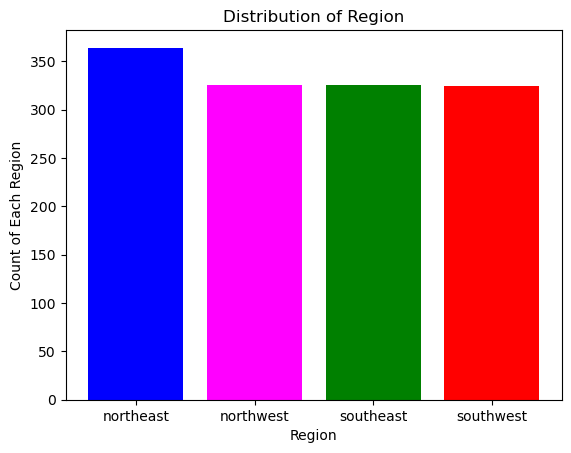

In [5]:
x = np.unique(data['region'])
y = data['region'].value_counts().tolist()

plt.bar(x, y, color=['blue', 'magenta', 'green', 'red'])
plt.xlabel('Region')
plt.ylabel('Count of Each Region')
plt.title('Distribution of Region')
plt.show()

### Sex

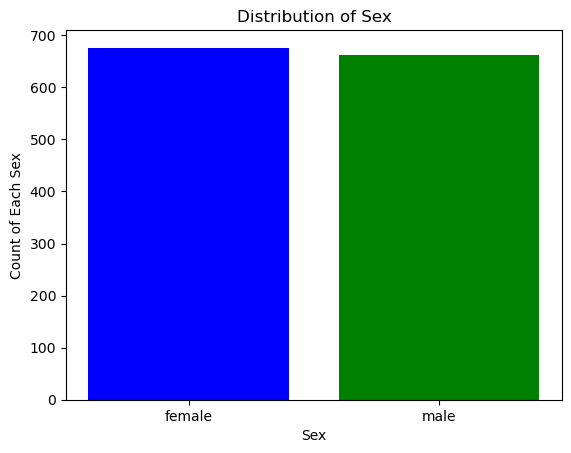

In [6]:
x = np.unique(data['sex'])
y = data['sex'].value_counts().tolist()

plt.bar(x, y, color=['blue', 'green'])
plt.xlabel('Sex')
plt.ylabel('Count of Each Sex')
plt.title('Distribution of Sex')
plt.show()

### Children

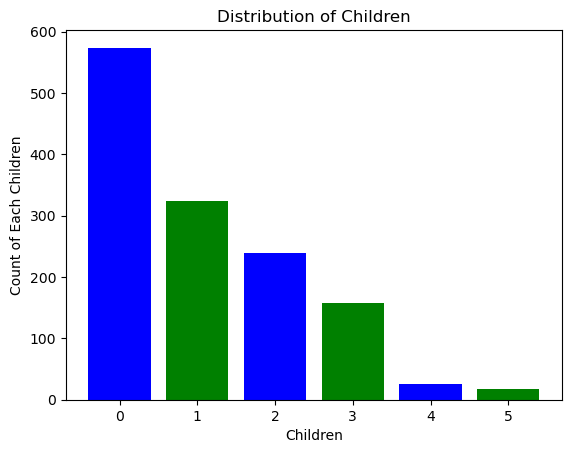

In [7]:
x = np.unique(data['children'])
y = data['children'].value_counts().tolist()

plt.bar(x, y, color=['blue', 'green'])
plt.xlabel('Children')
plt.ylabel('Count of Each Children')
plt.title('Distribution of Children')
plt.show()

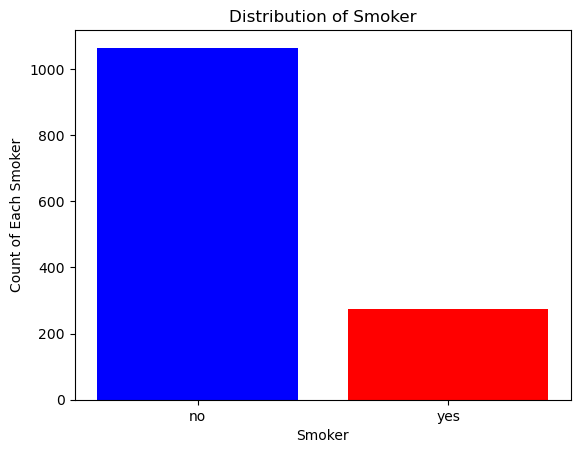

In [8]:
x = np.unique(data['smoker'])
y = data['smoker'].value_counts().tolist()

plt.bar(x, y, color=['blue', 'red'])
plt.xlabel('Smoker')
plt.ylabel('Count of Each Smoker')
plt.title('Distribution of Smoker')
plt.show()

## Range of Charges for Each Region

In [43]:
charges_range = data.groupby('region')['charges'].agg(['min', 'max', 'var', 'std'])

print(charges_range)

                 min          max           var           std
region                                                       
northeast  1694.7964  58571.07448  1.266931e+08  11255.803066
northwest  1621.3402  60021.39897  1.225953e+08  11072.276928
southeast  1121.8739  63770.42801  1.951916e+08  13971.098589
southwest  1241.5650  52590.82939  1.335684e+08  11557.179101


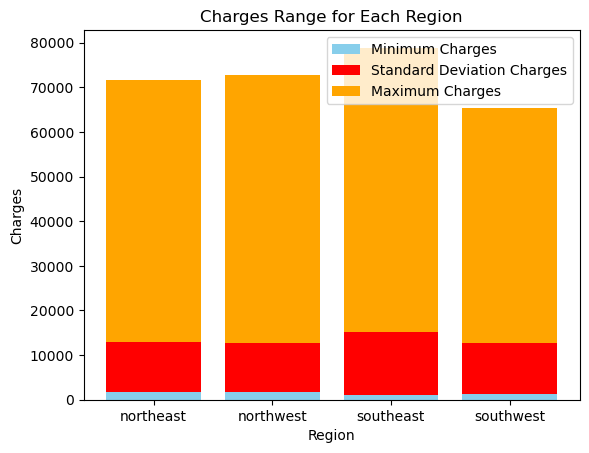

In [44]:
charges_range = charges_range.transpose()

# Plotting
regions = charges_range.columns
min_charges = charges_range.loc['min']
std_charges = charges_range.loc['std']
max_charges = charges_range.loc['max']

# Initialize the bar position
bar_position = np.arange(len(regions))


# Plotting each bar with proper stacking
plt.bar(regions, min_charges, label='Minimum Charges', color='skyblue')
plt.bar(regions, std_charges, bottom=min_charges, label='Standard Deviation Charges', color='red')
plt.bar(regions, max_charges, bottom=min_charges + std_charges, label='Maximum Charges', color='orange')

plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Range for Each Region')
plt.legend()
plt.show()


## Range of Charges for Each Sex

In [49]:
charges_range = data.groupby('sex')['charges'].agg(['min', 'max', 'var', 'std'])

print(charges_range)

              min          max           var           std
sex                                                       
female  1607.5101  63770.42801  1.238480e+08  11128.703801
male    1121.8739  62592.87309  1.682475e+08  12971.025915


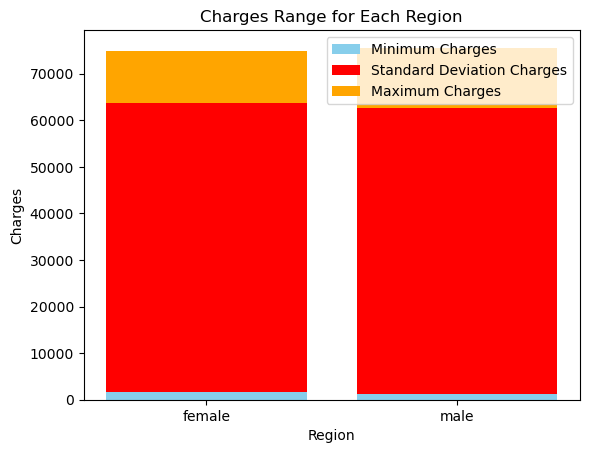

In [52]:
# Plotting
regions = charges_range.index
min_charges = charges_range['min']
max_charges = charges_range['max']
std_charges = charges_range['std']

plt.bar(regions, min_charges, label='Minimum Charges', color='skyblue')
plt.bar(regions, max_charges - min_charges, bottom=min_charges, label='Standard Deviation Charges', color='red')
plt.bar(regions, std_charges, bottom=min_charges + (max_charges - min_charges), label='Maximum Charges', color='orange')

plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Range for Each Region')
plt.legend()
plt.show()

## Range of Charges for Each Smoker

In [61]:
charges_range = data.groupby('smoker')['charges'].agg(['min', 'max', 'var', 'std'])

print(charges_range)

               min          max           var           std
smoker                                                     
no       1121.8739  36910.60803  3.592542e+07   5993.781819
yes     12829.4551  63770.42801  1.332073e+08  11541.547176


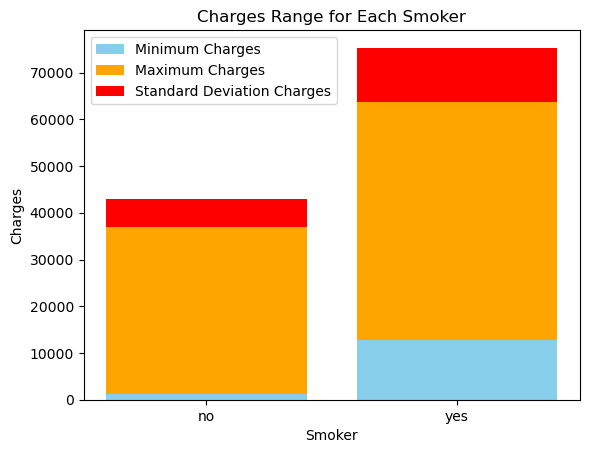

In [64]:
regions = charges_range.index
min_charges = charges_range['min']
max_charges = charges_range['max']
std_charges = charges_range['std']

plt.bar(regions, min_charges, label='Minimum Charges', color='skyblue')
plt.bar(regions, max_charges - min_charges, bottom=min_charges, label='Maximum Charges', color='orange')
plt.bar(regions, std_charges, bottom=max_charges, label='Standard Deviation Charges', color='red')

plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Range for Each Smoker')
plt.legend()
plt.show()


## Range of Charges for Each Children

In [65]:
charges_range = data.groupby('children')['charges'].agg(['min', 'max', 'var', 'std'])

print(charges_range)

                min          max           var           std
children                                                    
0         1121.8739  63770.42801  1.445596e+08  12023.293942
1         1711.0268  58571.07448  1.397983e+08  11823.631451
2         2304.0022  49577.66240  1.661874e+08  12891.368347
3         3443.0640  60021.39897  1.520503e+08  12330.869484
4         4504.6624  40182.24600  8.352540e+07   9139.223321
5         4687.7970  19023.26000  1.450418e+07   3808.435525


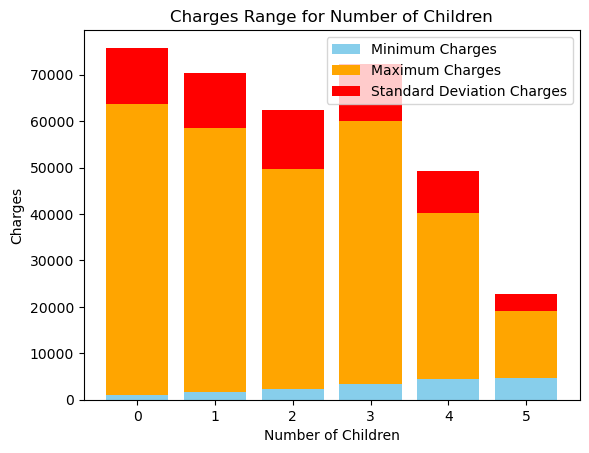

In [66]:
regions = charges_range.index
min_charges = charges_range['min']
max_charges = charges_range['max']
std_charges = charges_range['std']

plt.bar(regions, min_charges, label='Minimum Charges', color='skyblue')
plt.bar(regions, max_charges - min_charges, bottom=min_charges, label='Maximum Charges', color='orange')
plt.bar(regions, std_charges, bottom=max_charges, label='Standard Deviation Charges', color='red')

plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges Range for Number of Children')
plt.legend()
plt.show()


### Range of Price for Age groups

In [71]:
age_bins = [0, 18, 50, data['age'].max()]
age_labels = ['0-18', '19-50', '51+']

data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=True)

# Group by age group and calculate statistics for charges
age_group_charges = data.groupby('age_group')['charges'].agg(['min', 'max', 'mean', 'std'])

print(age_group_charges)

                 min          max          mean           std
age_group                                                    
0-18       1121.8739  38792.68560   7086.217556  10198.459989
19-50      1241.5650  62592.87309  11860.482506  11839.993152
51+        8782.4690  63770.42801  18084.987223  11682.005267


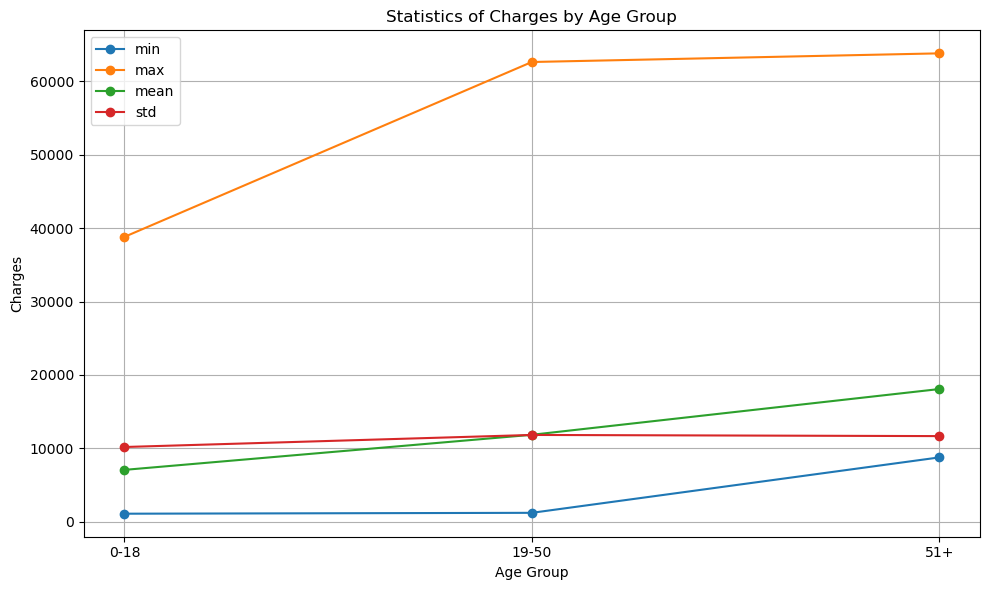

In [72]:
# Plotting
age_groups = age_group_charges.index
statistics = age_group_charges.columns

plt.figure(figsize=(10, 6))

for stat in statistics:
    plt.plot(age_groups, age_group_charges[stat], marker='o', label=stat)

plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.title('Statistics of Charges by Age Group')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Bubble Chart

### Bubble chart visualizing the relationship between age, BMI (Body Mass Index), and insurance charges for a given dataset of individuals. Each bubble represents an individual in the dataset.

- X-axis: Age
- Y-axis: BMI
- Bubble size: Charges (scaled down by dividing by 1000 for better visualization)
- Bubble color: Indicates if the individual is a smoker (red for smokers, blue for non-smokers)

### By visualizing the data in this way, several insights can be gained:

- Relationship between age and BMI: You can observe if there's any correlation between age and BMI. For example, you might see higher BMI values clustered around certain age ranges, indicating potential trends in weight gain or loss with age.

- Impact of smoking on charges: By looking at the color of the bubbles, you can see how being a smoker affects insurance charges. If smokers tend to have larger bubbles (indicating higher charges), it suggests that smoking is associated with increased healthcare costs.

- Outlier detection: Large bubbles that are significantly bigger or smaller than the rest might represent outliers in the dataset. These outliers could be individuals with exceptionally high or low insurance charges relative to their age and BMI.

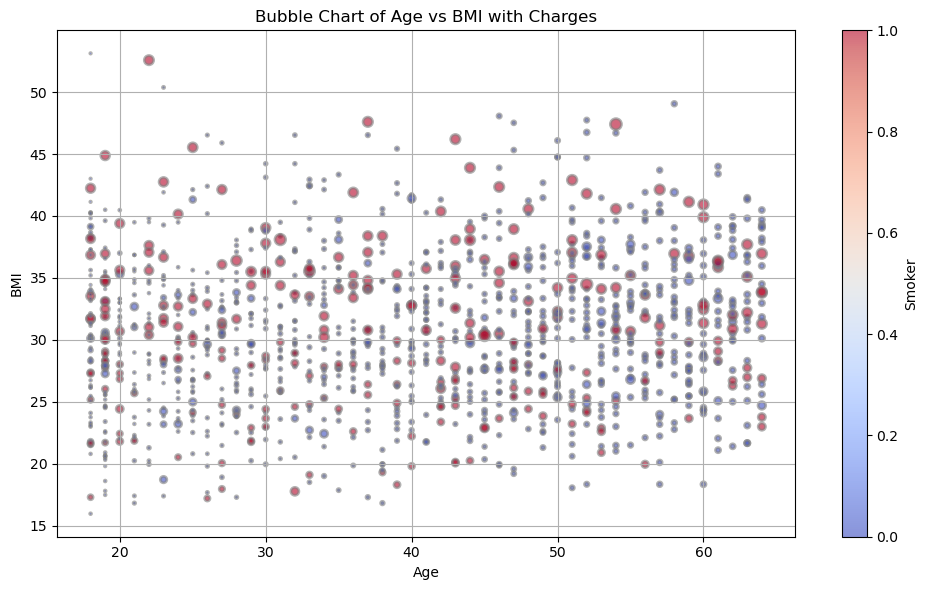

In [73]:
# Data
age = data['age']
bmi = data['bmi']
charges = data['charges']
smoker = data['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' column to numeric

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(age, bmi, s=charges/1000, c=smoker, cmap='coolwarm', alpha=0.6, edgecolors="grey", linewidth=2)
plt.colorbar(label='Smoker')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Bubble Chart of Age vs BMI with Charges')
plt.grid(True)
plt.tight_layout()
plt.show()